In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [46]:
data = pd.read_excel('./Приложение №1.xlsx', engine='openpyxl')

In [47]:
# getting atms numbers
atms = data['TERMINAL_ID'].unique()
len(atms)

1146

In [48]:
# getting support data for analise. Insert number month and number day 
data['month'] = pd.DatetimeIndex(data['date']).month
data['dayofmonth'] = data['date'].dt.day

### Проведем небольшой EDA

In [49]:
data['sum'].describe().apply("{0:.3f}".format)

count       62936.000
mean      2066957.088
std       2374764.419
min           500.000
25%        493500.000
50%       1342000.000
75%       2783625.000
max      33363000.000
Name: sum, dtype: object

<AxesSubplot:ylabel='Frequency'>

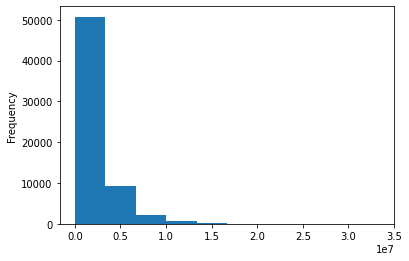

In [50]:
data['sum'].plot.hist()

данные "ровные", никаких аномалий не видно

#### Сделаем пробное предсказание на примере одного из банкоматов

In [97]:
data_by_atm = data[data['TERMINAL_ID'] == 11003]
data_by_atm

,TERMINAL_ID,date,sum,month,dayofmonth
0,11003,2020-07-15,1492000,7,15
1,11003,2020-07-16,2027000,7,16
2,11003,2020-07-17,728000,7,17
3,11003,2020-07-18,890000,7,18
4,11003,2020-07-19,940000,7,19
...,...,...,...,...,...
62,11003,2020-09-15,2752000,9,15
63,11003,2020-09-16,1226000,9,16
64,11003,2020-09-17,1193000,9,17
65,11003,2020-09-18,1512000,9,18


<AxesSubplot:xlabel='date'>

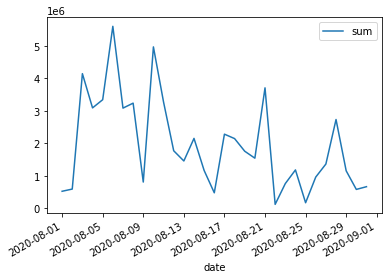

In [128]:
data_by_atm.where(data_by_atm['month'] == 8).plot.line(x='date', y='sum')

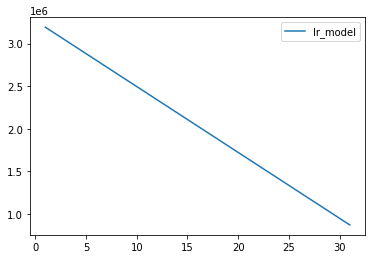

In [147]:
#plt.plot(range(1,len(y) + 1), y, label = 'augst')
plt.plot(range(1, len(lr_pred) + 1), lr_pred, label = 'lr_model')
#plt.plot(range(1, len(gb_october) + 1), gb_october, label = 'gb_model')
plt.legend()
plt.show()

In [152]:
scaler = StandardScaler()

x = data_by_atm['dayofmonth']
y = data_by_atm['sum']
#y = scaler.fit_transform(np.array(y).reshape(-1, 1))
x_data, y_data = np.array(x), np.array(y)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
x_train, y_train

(array([12, 12, 15, 15, 18,  1, 22, 25, 14,  7,  3, 28, 26, 15, 30, 28,  6,
        18,  1, 17, 23, 31, 21, 19, 18, 30, 11, 10,  8,  3, 26, 16, 16,  2,
        21, 13, 27,  8, 16,  5, 17,  9, 23, 19,  5,  7, 11, 25,  6,  2, 10,
        22,  4, 13, 29,  4]),
 array([2248000, 1772000, 1492000, 2752000, 2147000, 1897000, 2024000,
         172000, 2153000, 1925000, 4146000, 2734000,  962000, 1165000,
         582000,  862000, 1560000,  890000,  525000, 2283000, 1690000,
         666000, 1583000,  631000, 1512000, 2451000, 3271000, 4970000,
        3238000, 3626000,  444000,  478000, 1226000, 4131000, 3709000,
        1458000, 1364000, 3941000, 2027000, 3344000,  728000, 2445000,
         762000, 1758000, 2148000, 3085000, 4008000, 1525000, 5603000,
         593000, 4583000,  122000, 3092000,  617000, 1901000, 4836000]))

In [153]:
# модель линейная регрессия
lr_model = LinearRegression()
lr_model.fit(x_train.reshape(-1, 1), y_train.reshape(-1, 1))
score = lr_model.score(x_test.reshape(-1, 1), y_test.reshape(-1, 1))
score

-3.0222955989085953

In [154]:
x_test, y_test

(array([20, 31, 19, 24, 29, 24, 14, 20, 17, 27,  9]),
 array([1544000, 1152000,  940000, 2031000, 1155000, 1182000, 1366000,
        1893000, 1193000, 1632000,  809000]))

In [172]:
# модель градиентный бустинг 
gb_model = GradientBoostingRegressor(n_estimators=50, max_depth=1, criterion='friedman_mse', loss='ls', learning_rate=0.01)
gb_model.fit(x_train.reshape(-1, 1), y_train.ravel())
score = gb_model.score(x_test.reshape(-1, 1), y_test.reshape(-1 ,1))
score

-3.100377601708371

In [156]:
# проверим работу модели GBR
x_try = np.array([20, 31, 19, 24, 29, 24, 14, 20, 17, 27,  9, 12, 12, 15])
predicts = gb_model.predict(x_try.reshape(-1 ,1))
predicts

array([1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469, 2530504.8403439 , 1900357.02124169,
       1900357.02124169, 1845929.82758469])

In [157]:
# выше предсказанные даные, ниже реальные данные. На первый взгляд все хорошо
y_test

array([1544000, 1152000,  940000, 2031000, 1155000, 1182000, 1366000,
       1893000, 1193000, 1632000,  809000])

In [158]:
# проверим работу линейной модели
preds = lr_model.predict(x_try.reshape(-1,1))
preds

array([[1721717.51193152],
       [ 870277.03304999],
       [1799121.19182984],
       [1412102.79233824],
       [1025084.39284663],
       [1412102.79233824],
       [2186139.59132145],
       [1721717.51193152],
       [1953928.55162648],
       [1179891.75264327],
       [2573157.99081305],
       [2340946.95111809],
       [2340946.95111809],
       [2108735.91142312]])

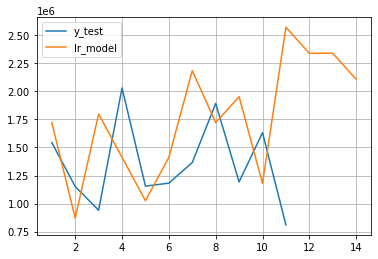

In [159]:
plt.grid()
plt.plot(range(1,len(y_test) + 1), y_test, label = 'y_test')
plt.plot(range(1, len(preds) + 1), preds, label = 'lr_model')
#plt.plot(range(1, len(predicts) + 1), predicts, label = 'gb_model')
plt.legend()
plt.show()

In [160]:
# подготовим данные для октября
october = [i for i in range(1,32)]
p = np.array(october)
p.shape

(31,)

In [170]:
gb_october = gb_model.predict(p.reshape(-1, 1))
gb_october

array([2530504.8403439 , 2530504.8403439 , 2530504.8403439 ,
       2530504.8403439 , 2530504.8403439 , 2530504.8403439 ,
       2530504.8403439 , 2530504.8403439 , 2530504.8403439 ,
       2530504.8403439 , 2530504.8403439 , 1900357.02124169,
       1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469, 1845929.82758469, 1845929.82758469,
       1845929.82758469])

In [171]:
lr_october = lr_model.predict(p.reshape(-1, 1))
lr_october

array([[3192387.42999962],
       [3114983.75010129],
       [3037580.07020297],
       [2960176.39030465],
       [2882772.71040633],
       [2805369.03050801],
       [2727965.35060969],
       [2650561.67071137],
       [2573157.99081305],
       [2495754.31091473],
       [2418350.63101641],
       [2340946.95111809],
       [2263543.27121977],
       [2186139.59132145],
       [2108735.91142312],
       [2031332.2315248 ],
       [1953928.55162648],
       [1876524.87172816],
       [1799121.19182984],
       [1721717.51193152],
       [1644313.8320332 ],
       [1566910.15213488],
       [1489506.47223656],
       [1412102.79233824],
       [1334699.11243992],
       [1257295.4325416 ],
       [1179891.75264327],
       [1102488.07274495],
       [1025084.39284663],
       [ 947680.71294831],
       [ 870277.03304999]])

In [166]:
# сравним с августом, так как в этом месяце больше данных
y = data_by_atm['sum'][data['month'] == 8]
y

17     525000
18     593000
19    4146000
20    3092000
21    3344000
22    5603000
23    3085000
24    3238000
25     809000
26    4970000
27    3271000
28    1772000
29    1458000
30    2153000
31    1165000
32     478000
33    2283000
34    2147000
35    1758000
36    1544000
37    3709000
38     122000
39     762000
40    1182000
41     172000
42     962000
43    1364000
44    2734000
45    1155000
46     582000
47     666000
Name: sum, dtype: int64

In [168]:
data_for_plot = pd.DataFrame(columns=['lr_model', 'august'])
data_for_plot['lr_model'] = lr_october
data_for_plot['august'] = y
data_for_plot

Exception: Data must be 1-dimensional

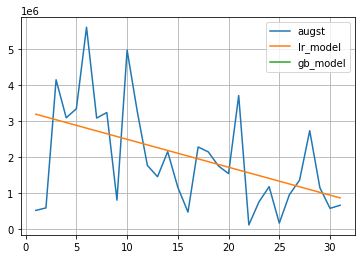

In [169]:
plt.grid()
plt.plot(range(1,len(y) + 1), y, label = 'augst')
plt.plot(range(1, len(lr_october) + 1), lr_october, label = 'lr_model')
plt.plot(range(1, len(gb_october) + 1), gb_october, label = 'gb_model')
plt.legend()
plt.show()

Градиентный бустинг дал наилучший результ. Линейная модель все-таки слишком прямолинейна.

In [ ]:
plt.grid()
plt.scatter(range(1, len(october) + 1), october)

In [ ]:
y = np.delete(y, np.argwhere( y == 'nan'))
y

In [ ]:
model = LinearRegression()
x_train = y.sum[:-20]
x_test = y.sum[-20:]

x_train, x_test

#model.fit(x)

In [ ]:
x = data['date'].where((data['month'] == 8) & (data['TERMINAL_ID'] == 11003))
y = data['sum'].where((data['month'] == 8) & (data['TERMINAL_ID'] == 11003))

plt.grid()
plt.scatter(x, y)

In [ ]:
x = data['date'].where((data['month'] == 9) & (data['TERMINAL_ID'] == 11003))
y = data['sum'].where((data['month'] == 9) & (data['TERMINAL_ID'] == 11003))

plt.grid()
plt.scatter(x, y)